Data exploration and preprocessing: Understanding data with
visualization; Cleansing data 

Invalid values ​​of -99.9 are present in all data sets and may need to be treated as missing values.

In [4]:
data_2022 = pd.read_csv('2022.csv')
data_2023 = pd.read_csv('2023.csv')
data_2024 = pd.read_csv('2024.csv')

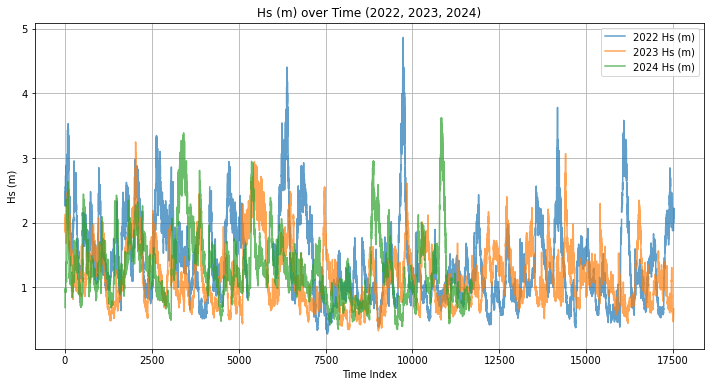

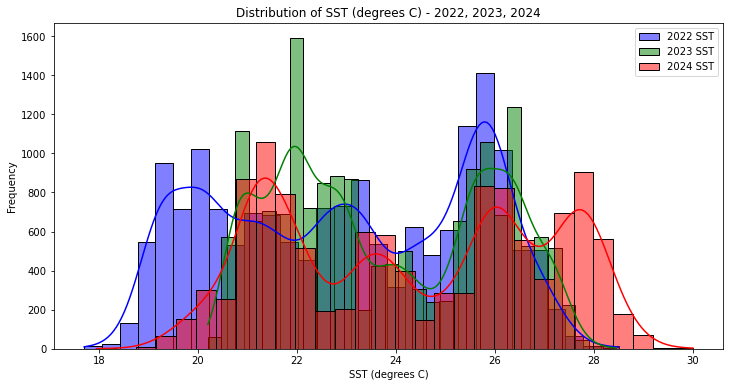

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replacing erroneous values (-99.9) with NaN in all datasets
columns_to_clean = ['Hs (m)', 'Hmax (m)', 'Tz (s)', 'Tp (s)', 'Peak Direction (degrees)', 'SST (degrees C)']

# Cleaning the datasets by replacing -99.9 with NaN
data_2022_clean = data_2022.replace(-99.9, np.nan)
data_2023_clean = data_2023.replace(-99.9, np.nan)
data_2024_clean = data_2024.replace(-99.9, np.nan)

# Now we can visualize the cleaned data. Let's plot some basic visualizations.

# Setting up a plot for Hs (m) over time for all datasets
plt.figure(figsize=(12, 6))
plt.plot(data_2022_clean['Hs (m)'], label='2022 Hs (m)', alpha=0.7)
plt.plot(data_2023_clean['Hs (m)'], label='2023 Hs (m)', alpha=0.7)
plt.plot(data_2024_clean['Hs (m)'], label='2024 Hs (m)', alpha=0.7)
plt.title('Hs (m) over Time (2022, 2023, 2024)')
plt.xlabel('Time Index')
plt.ylabel('Hs (m)')
plt.legend()
plt.grid(True)
plt.show()

# Now let's visualize the distribution of SST (Sea Surface Temperature)
plt.figure(figsize=(12, 6))
sns.histplot(data_2022_clean['SST (degrees C)'], label='2022 SST', color='blue', kde=True, bins=30, alpha=0.5)
sns.histplot(data_2023_clean['SST (degrees C)'], label='2023 SST', color='green', kde=True, bins=30, alpha=0.5)
sns.histplot(data_2024_clean['SST (degrees C)'], label='2024 SST', color='red', kde=True, bins=30, alpha=0.5)
plt.title('Distribution of SST (degrees C) - 2022, 2023, 2024')
plt.xlabel('SST (degrees C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


CRUD operations: Need to update or delete values in the source file
or in the database. 

Update operation: We replace the values ​​in a specific column with new numerical values, for example, replace temperatures less than 20 with 20 in the SST (degrees C) column.
Delete operation: We can delete all rows with NaN in column Hs (m).

In [6]:
# Update Operation: Replace SST values less than 20 with 20
data_2022_clean.loc[data_2022_clean['SST (degrees C)'] < 20, 'SST (degrees C)'] = 20
data_2023_clean.loc[data_2023_clean['SST (degrees C)'] < 20, 'SST (degrees C)'] = 20
data_2024_clean.loc[data_2024_clean['SST (degrees C)'] < 20, 'SST (degrees C)'] = 20

# Delete Operation: Remove rows where 'Hs (m)' is NaN
data_2022_clean = data_2022_clean.dropna(subset=['Hs (m)'])
data_2023_clean = data_2023_clean.dropna(subset=['Hs (m)'])
data_2024_clean = data_2024_clean.dropna(subset=['Hs (m)'])

# Check the number of remaining rows after the delete operation
rows_2022 = data_2022_clean.shape[0]
rows_2023 = data_2023_clean.shape[0]
rows_2024 = data_2024_clean.shape[0]

# Display results to the user
rows_2022, rows_2023, rows_2024


(16778, 17504, 11702)

Complex big data queries using Spark SQL: At least four
different insights or patterns from the queries.Query result visualization (diagram or table) and conclusion

In [17]:
#Import SparkSession
from pyspark.sql import SparkSession

#Initialize SparkSession
spark = SparkSession.builder.appName("Big Data Queries").getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df_2022 = spark.createDataFrame(data_2022_clean)
spark_df_2023 = spark.createDataFrame(data_2023_clean)
spark_df_2024 = spark.createDataFrame(data_2024_clean)

#Create temporary view
spark_df_2022.createOrReplaceTempView("data_2022_view")
spark_df_2023.createOrReplaceTempView("data_2023_view")
spark_df_2024.createOrReplaceTempView("data_2024_view")

+----+-----+------------------+------------------+
|Year|Month|            Avg_Hs|           Avg_SST|
+----+-----+------------------+------------------+
|2022|    1|  1.71544586415602|               NaN|
|2022|    2|1.7930446428571432| 26.04698660714289|
|2022|    3|1.3965697909642625|               NaN|
|2022|    4| 1.660281115879828|               NaN|
|2022|    5| 1.949338595106549|               NaN|
|2022|    6| 0.911209027777777|21.548333333333353|
|2022|    7|1.3485282258064528| 20.12449596774189|
|2022|    8| 1.028767473118277|20.019422043010763|
|2022|    9|1.0188783877692855|               NaN|
|2022|   10|1.4246186953597864|               NaN|
|2022|   11|0.9911183020180938| 22.90967292971463|
|2022|   12|1.4470222072678316|24.242799461641944|
|2023|    1|1.2724374999999981|25.946202956989183|
|2023|    2|1.4366150409530927|               NaN|
|2023|    3|1.0758149394347247|               NaN|
|2023|    4| 1.518583043780403|               NaN|
|2023|    5|   1.1253561827957|

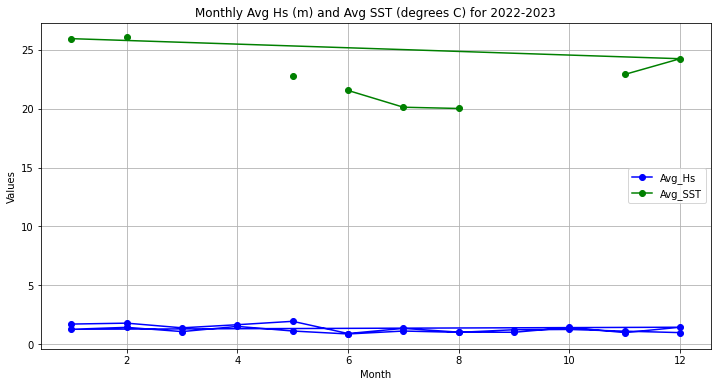

In [23]:
query = """
SELECT 
    YEAR(TO_DATE(`Date/Time (AEST)`)) AS Year, 
    MONTH(TO_DATE(`Date/Time (AEST)`)) AS Month, 
    AVG(`Hs (m)`) AS Avg_Hs, 
    AVG(`SST (degrees C)`) AS Avg_SST
FROM (
    SELECT `Date/Time (AEST)`, `Hs (m)`, `SST (degrees C)` FROM data_2022_view
    UNION ALL
    SELECT `Date/Time (AEST)`, `Hs (m)`, `SST (degrees C)` FROM data_2023_view
) AS combined_data
GROUP BY YEAR(TO_DATE(`Date/Time (AEST)`)), MONTH(TO_DATE(`Date/Time (AEST)`))
ORDER BY Year, Month
"""

result = spark.sql(query)
result.show()
result_df = result.toPandas()
plt.figure(figsize=(12, 6))
plt.plot(result_df['Month'], result_df['Avg_Hs'], marker='o', label='Avg_Hs', color='blue')
plt.plot(result_df['Month'], result_df['Avg_SST'], marker='o', label='Avg_SST', color='green')
plt.title('Monthly Avg Hs (m) and Avg SST (degrees C) for 2022-2023')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

Query 1: Calculate the average Hs (m) and SST (degrees C) for each month to compare 2022 and 2023 data.

+----+------------+-----------------------+
|Year|High_Hs_Days|Avg_SST_On_High_Hs_Days|
+----+------------+-----------------------+
|2022|        2884|     24.257766990291305|
|2023|        1061|                    NaN|
+----+------------+-----------------------+



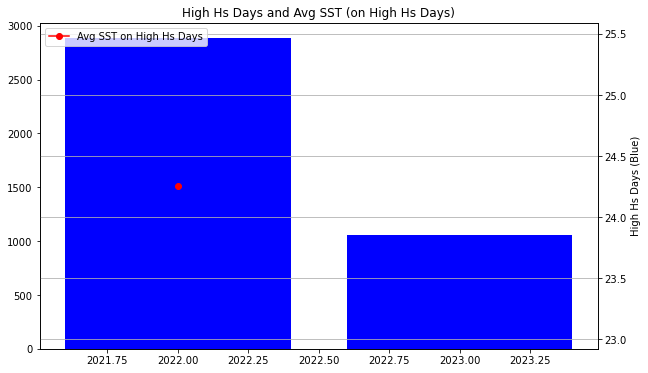

In [24]:
query = """
SELECT 
    YEAR(TO_DATE(`Date/Time (AEST)`)) AS Year, 
    COUNT(*) AS High_Hs_Days, 
    AVG(`SST (degrees C)`) AS Avg_SST_On_High_Hs_Days
FROM (
    SELECT `Date/Time (AEST)`, `Hs (m)`, `SST (degrees C)` FROM data_2022_view
    UNION ALL
    SELECT `Date/Time (AEST)`, `Hs (m)`, `SST (degrees C)` FROM data_2023_view
) AS combined_data
WHERE `Hs (m)` > 2
GROUP BY YEAR(TO_DATE(`Date/Time (AEST)`))
ORDER BY Year
"""
result = spark.sql(query)
result_df = result.toPandas()
result.show()
# Visualization: Use a histogram to display the number of days with wave heights exceeding 2 meters and the corresponding average SST
import matplotlib.pyplot as plt

#Set chart size
plt.figure(figsize=(10, 6))

# Draw a histogram of days with wave heights exceeding 2 meters
plt.bar(result_df['Year'], result_df['High_Hs_Days'], color='blue', label='High Hs Days')

# Plot the corresponding mean sea surface temperature (SST) on the right axis
plt.twinx()
plt.plot(result_df['Year'], result_df['Avg_SST_On_High_Hs_Days'], marker='o', color='red', label='Avg SST on High Hs Days')

# Chart titles and labels
plt.title('High Hs Days and Avg SST (on High Hs Days)')
plt.xlabel('Year')
plt.ylabel('High Hs Days (Blue)')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

Query 2: Find dates with wave heights greater than 2 meters, calculate the average sea surface temperature for these dates, and compare the difference in 2022 and 2023.

+------------------------+------------------+----+
|Peak Direction (degrees)|            Avg_Hs|Year|
+------------------------+------------------+----+
|                     9.0|0.8059999999999999|2022|
|                    11.0|0.7979999999999999|2022|
|                    16.0|             1.321|2022|
|                    18.0|1.1633333333333333|2022|
|                    19.0|            0.8695|2022|
|                    21.0|0.8257999999999999|2022|
|                    22.0| 0.925090909090909|2022|
|                    23.0|1.0289285714285714|2022|
|                    25.0|0.8946000000000001|2022|
|                    26.0|0.9877222222222221|2022|
|                    28.0|0.8664444444444447|2022|
|                    29.0|0.9586896551724138|2022|
|                    30.0|0.9271923076923076|2022|
|                    32.0|0.8618684210526317|2022|
|                    33.0|0.8962666666666667|2022|
|                    35.0|0.8391612903225807|2022|
|                    36.0|0.935

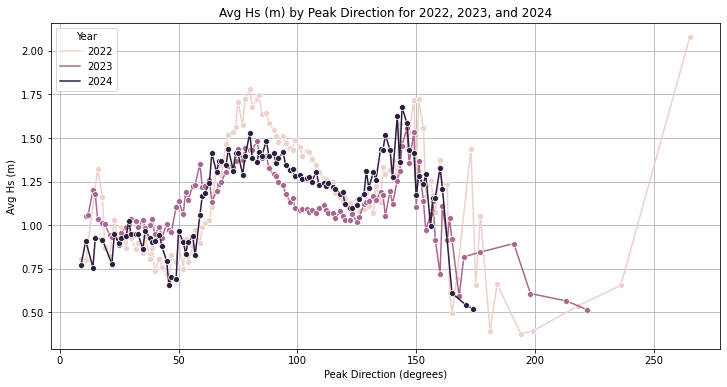

In [25]:
query = """
SELECT 
    `Peak Direction (degrees)`, 
    AVG(`Hs (m)`) AS Avg_Hs,
    YEAR(TO_DATE(`Date/Time (AEST)`)) AS Year
FROM (
    SELECT `Peak Direction (degrees)`, `Hs (m)`, `Date/Time (AEST)` FROM data_2022_view
    UNION ALL
    SELECT `Peak Direction (degrees)`, `Hs (m)`, `Date/Time (AEST)` FROM data_2023_view
    UNION ALL
    SELECT `Peak Direction (degrees)`, `Hs (m)`, `Date/Time (AEST)` FROM data_2024_view
) AS combined_data
GROUP BY `Peak Direction (degrees)`, YEAR(TO_DATE(`Date/Time (AEST)`))
ORDER BY Year, `Peak Direction (degrees)`
"""

result = spark.sql(query)
result_df = result.toPandas()
result.show()
# Visualization: Plot the average wave height in different directions
plt.figure(figsize=(12, 6))

# Use seaborn to draw line graphs
sns.lineplot(x='Peak Direction (degrees)', y='Avg_Hs', hue='Year', data=result_df, marker='o')

# Add title and tags
plt.title('Avg Hs (m) by Peak Direction for 2022, 2023, and 2024')
plt.xlabel('Peak Direction (degrees)')
plt.ylabel('Avg Hs (m)')
plt.grid(True)

plt.show()

Query 3: Combine three years of data, calculate the average wave height under different wave crest directions, and show the relationship between wave crest direction and wave height.

Index(['Year', 'Correlation_Tp_Hs'], dtype='object')


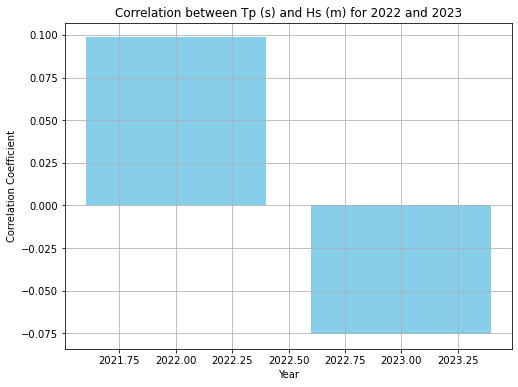

In [27]:
# Alternative query 4: Calculate the correlation between Tp (s) and Hs (m) for each year
query = """
SELECT 
    YEAR(TO_DATE(`Date/Time (AEST)`)) AS Year, 
    CORR(`Tp (s)`, `Hs (m)`) AS Correlation_Tp_Hs
FROM (
    SELECT `Tp (s)`, `Hs (m)`, `Date/Time (AEST)` FROM data_2022_view
    UNION ALL
    SELECT `Tp (s)`, `Hs (m)`, `Date/Time (AEST)` FROM data_2023_view
) AS combined_data
GROUP BY YEAR(TO_DATE(`Date/Time (AEST)`))
ORDER BY Year
"""

# Execute the query and convert the results to a Pandas DataFrame
result = spark.sql(query)
result_df = result.toPandas()

# View the column names of the results
print(result_df.columns)
#Set chart size
plt.figure(figsize=(8, 6))

# Use a histogram to show the correlation between Tp and Hs for each year
plt.bar(result_df['Year'], result_df['Correlation_Tp_Hs'], color='skyblue')

# Add title and axis labels
plt.title('Correlation between Tp (s) and Hs (m) for 2022 and 2023')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')

# show grid
plt.grid(True)

plt.show()

Relationship between Tp (s) and Hs (m)
Calculate the correlation between Tp (s) (wave period) and Hs (m) (wave height) for each year and analyze the relationship between wave period and wave height.